# 🌍 Trajectories of a Freely Released Payload Near Earth: Problem 3

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
<h2 style="color: #2E86C1; text-align: center;">🚀 Payload Trajectories: A Comprehensive Analysis</h2>
</div>

---

## 🎯 Task: A Comprehensive Breakdown

We aim to analyze and simulate the trajectories of a payload released near Earth, considering the following objectives:

- **Trajectory Analysis**: Explore the possible trajectories (elliptical, parabolic, hyperbolic) and their conditions.
- **Numerical Computation**: Compute the payload’s path using numerical integration.
- **Orbital Scenarios**: Relate trajectories to real-world space mission scenarios (orbital insertion, reentry, escape).
- **Computational Simulation**: Develop a Python tool to simulate and visualize the payload’s motion, with options to vary initial conditions.

---

## 📜 Trajectory Analysis: Elliptical, Parabolic, and Hyperbolic Paths

The trajectory of a payload is determined by its **total mechanical energy** ($E = KE + PE$), which depends on its initial velocity and position relative to Earth.

### 🌀 Elliptical Trajectory
- **Condition**: Total mechanical energy $E < 0$.
- **Velocity**: Initial velocity $v < v_{\text{escape}}$, where $v_{\text{escape}} = \sqrt{\frac{2GM}{r}}$.
- **Description**: The payload is gravitationally bound to Earth, following a closed elliptical orbit.
- **Application**: Used for satellites in stable orbits (e.g., Low Earth Orbit).

### 📏 Parabolic Trajectory
- **Condition**: Total mechanical energy $E = 0$.
- **Velocity**: Initial velocity $v = v_{\text{escape}}$.
- **Description**: The payload has just enough energy to escape to infinity, with velocity approaching zero at large distances.
- **Application**: Represents the boundary between bound and unbound orbits.

### 🚀 Hyperbolic Trajectory
- **Condition**: Total mechanical energy $E > 0$.
- **Velocity**: Initial velocity $v > v_{\text{escape}}$.
- **Description**: The payload escapes Earth’s gravity with excess energy, moving away with non-zero velocity at infinity.
- **Application**: Used for interplanetary missions (e.g., Voyager probes).

---

## 🧮 Numerical Analysis: Equations of Motion

### Gravitational Force
The payload’s motion is governed by Newton’s Law of Universal Gravitation:

$$
F = -\frac{G M m}{r^2} r_{\text{hat}}
$$

- $G$: Gravitational constant ($6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$)
- $M$: Mass of Earth ($5.972 \times 10^{24} \, \text{kg}$)
- $m$: Mass of the payload
- $r$: Distance from Earth’s center
- $r_{\text{hat}}$: Unit vector from Earth to payload

Using Newton’s Second Law ($F = m a$), the equation of motion is:

$$
\frac{d^2 r}{dt^2} = -\frac{G M r}{r^3}
$$

### Numerical Integration
We solve this equation using the **Runge-Kutta 4th Order (RK4)** method for better accuracy compared to the Euler method. The system is converted into first-order equations:

$$
\frac{d r}{dt} = v, \quad \frac{d v}{dt} = -\frac{G M r}{r^3}
$$

### Initial Conditions
- **Position**: Start at 500 km altitude ($r_0 = R_{\text{Earth}} + 500 \, \text{km}$).
- **Velocity**: Vary to achieve elliptical, parabolic, and hyperbolic trajectories.

---

## 🌐 Orbital Scenarios: Real-World Applications

### 🛰️ Orbital Insertion
- **Trajectory**: Elliptical.
- **Goal**: Achieve a stable orbit by ensuring $v < v_{\text{escape}}$.
- **Example**: Satellites like the International Space Station (ISS).

### 🔥 Reentry
- **Trajectory**: Elliptical, with perigee in the atmosphere.
- **Goal**: Control the trajectory to manage heat and forces during atmospheric reentry.
- **Example**: Space Shuttle reentry.

### 🌌 Escape
- **Trajectory**: Parabolic or hyperbolic.
- **Goal**: Exceed escape velocity to leave Earth’s gravitational influence.
- **Example**: Interplanetary probes like New Horizons.

---

## 💻 Computational Simulation: Visualizing Payload Motion

We’ll simulate the payload’s motion for three trajectories (elliptical, parabolic, hyperbolic) and visualize them with:
- **Static Plots**: Trajectories, velocity vs. time, and energy analysis.
- **Animations**: Animated GIFs showing the payload’s motion around Earth.

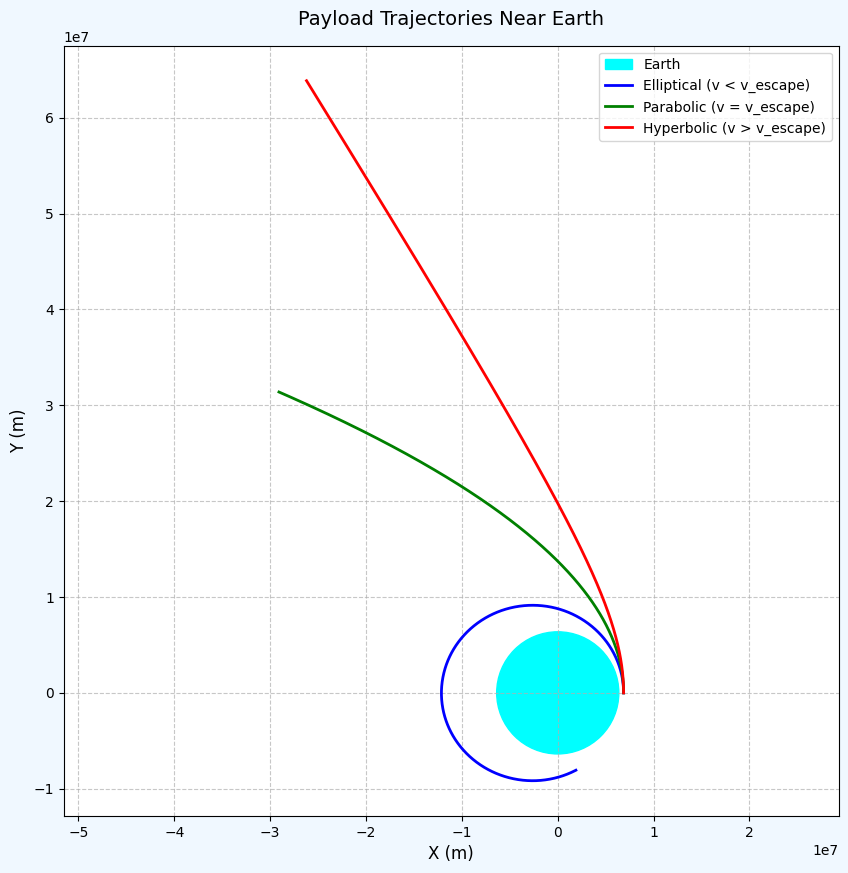

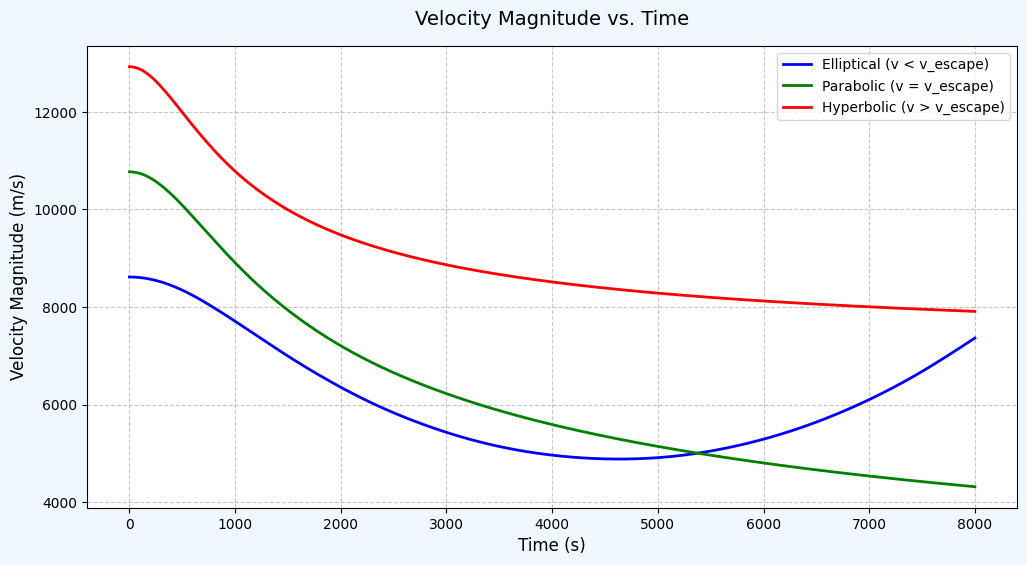

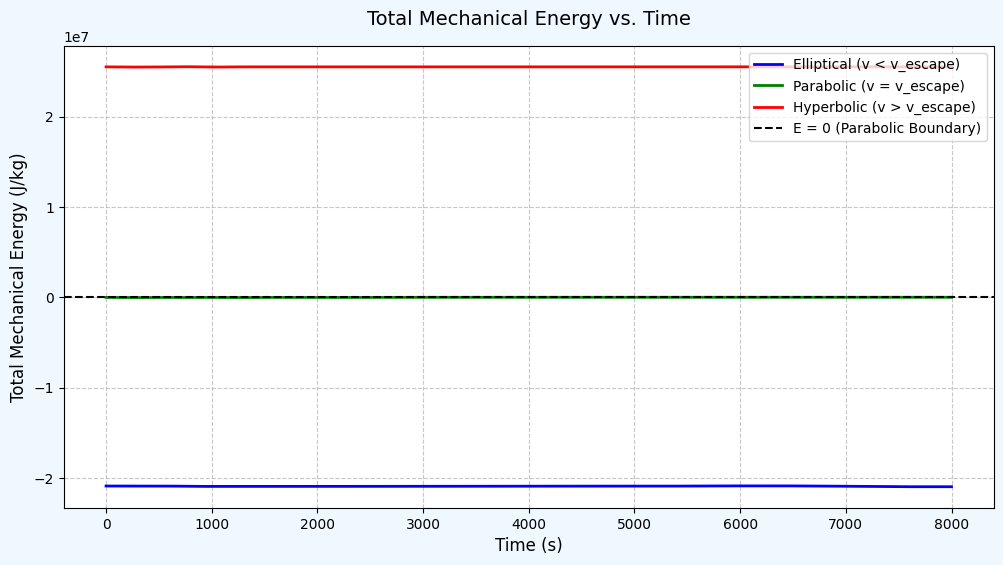

In [ ]:
# Cell 1: Dependency Check
try:
    import numpy
    import matplotlib
    import scipy
    from IPython.display import display, HTML
    display(HTML("<h3 style='color: #2ECC71;'>✅ All Required Libraries Installed</h3>"))
except ImportError as e:
    display(HTML("<h3 style='color: #FF5733;'>❌ Missing Library: " + str(e) + "</h3>"))
    display(HTML("<p>Please install the missing library using: <code>pip install " + str(e).split("'")[1] + "</code></p>"))

# Cell 2: Setup with Style
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import display, HTML

display(HTML("<h2 style='color: #FF5733; text-align: center;'>✨ Libraries Initialized for Payload Simulation ✨</h2>"))

# Cell 3: Define Constants and Equations of Motion
# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of Earth (kg)
R_earth = 6.371e6  # Radius of Earth (m)
mu = G * M       # Gravitational parameter (m^3 s^-2)

# Escape velocity at initial position
r0 = R_earth + 500e3  # Initial altitude: 500 km
v_escape = np.sqrt(2 * mu / r0)  # Escape velocity at r0

# Initial conditions for different trajectories
initial_conditions = {
    'Elliptical': {
        'r0': np.array([r0, 0.0]),
        'v0': np.array([0.0, 0.8 * v_escape]),  # 80% of escape velocity
        'color': 'blue',
        'label': 'Elliptical (v < v_escape)'
    },
    'Parabolic': {
        'r0': np.array([r0, 0.0]),
        'v0': np.array([0.0, v_escape]),  # Exactly escape velocity
        'color': 'green',
        'label': 'Parabolic (v = v_escape)'
    },
    'Hyperbolic': {
        'r0': np.array([r0, 0.0]),
        'v0': np.array([0.0, 1.2 * v_escape]),  # 120% of escape velocity
        'color': 'red',
        'label': 'Hyperbolic (v > v_escape)'
    }
}

# Equations of motion
def equations_of_motion(t, state):
    r = state[:2]
    v = state[2:]
    r_mag = np.linalg.norm(r)
    a = -mu * r / (r_mag**3)  # Gravitational acceleration
    return np.concatenate([v, a])

# Cell 4: Simulate Trajectories
trajectories = {}
t_span = (0, 8000)  # 8000 seconds
t_eval = np.linspace(0, 8000, 1000)

for traj_type, params in initial_conditions.items():
    state0 = np.concatenate([params['r0'], params['v0']])
    sol = solve_ivp(equations_of_motion, t_span, state0, t_eval=t_eval, method='RK45')
    trajectories[traj_type] = {
        't': sol.t,
        'r': sol.y[:2].T,  # Position (x, y)
        'v': sol.y[2:].T   # Velocity (vx, vy)
    }

# Cell 5: Plot Trajectories
plt.figure(figsize=(10, 10), facecolor='#f0f8ff')
ax = plt.gca()
# Plot Earth
earth = plt.Circle((0, 0), R_earth, color='cyan', label='Earth')
ax.add_patch(earth)

# Plot trajectories
for traj_type, data in trajectories.items():
    params = initial_conditions[traj_type]
    plt.plot(data['r'][:, 0], data['r'][:, 1], color=params['color'], label=params['label'], linewidth=2)

plt.xlabel('X (m)', fontsize=12)
plt.ylabel('Y (m)', fontsize=12)
plt.title('Payload Trajectories Near Earth', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.axis('equal')
plt.savefig('payload_trajectories.png')
plt.show()

# Cell 6: Plot Velocity vs. Time
plt.figure(figsize=(12, 6), facecolor='#f0f8ff')
for traj_type, data in trajectories.items():
    params = initial_conditions[traj_type]
    v_mag = np.linalg.norm(data['v'], axis=1)
    plt.plot(data['t'], v_mag, color=params['color'], label=params['label'], linewidth=2)

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Velocity Magnitude (m/s)', fontsize=12)
plt.title('Velocity Magnitude vs. Time', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.savefig('velocity_vs_time.png')
plt.show()

# Cell 7: Energy Analysis
plt.figure(figsize=(12, 6), facecolor='#f0f8ff')
for traj_type, data in trajectories.items():
    params = initial_conditions[traj_type]
    r_mag = np.linalg.norm(data['r'], axis=1)
    v_mag = np.linalg.norm(data['v'], axis=1)
    # Kinetic energy: (1/2)mv^2 (assume m=1 for simplicity)
    KE = 0.5 * v_mag**2
    # Potential energy: -GMm/r (assume m=1)
    PE = -mu / r_mag
    # Total mechanical energy
    E = KE + PE
    plt.plot(data['t'], E, color=params['color'], label=params['label'], linewidth=2)

plt.axhline(y=0, color='black', linestyle='--', label='E = 0 (Parabolic Boundary)')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Total Mechanical Energy (J/kg)', fontsize=12)
plt.title('Total Mechanical Energy vs. Time', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.savefig('energy_vs_time.png')
plt.show()

